In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/upflairs-pvt-ltd/1st_june_data_science/master/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#finding duplicate records
print("duplicate records : ",df.duplicated().sum())

duplicate records :  1


In [ ]:
#checking missing values::
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.columns=['age', 'gender', 'bmi', 'child', 'smoker', 'region', 'charges']

In [ ]:
df.head(2)

,age,gender,bmi,child,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [ ]:
df["gender"].value_counts()

gender
male      676
female    662
Name: count, dtype: int64

In [ ]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [ ]:
print(df["charges"].min())
df["charges"].max()

1121.8739


63770.42801

In [ ]:
df["charges"].mean()

13270.422265141257

In [ ]:
male=df[df["gender"]=="male"]
female=df[df["gender"]=="female"]



In [ ]:
print("female avg charges: ",female["charges"].mean())
print("male avg charges: ",male["charges"].mean())

female avg charges:  12569.578843835347
male avg charges:  13956.751177721893


In [ ]:
female["smoker"].value_counts()

smoker
no     547
yes    115
Name: count, dtype: int64

In [ ]:
male["smoker"].value_counts()

smoker
no     517
yes    159
Name: count, dtype: int64

In [ ]:
female

,age,gender,bmi,child,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [ ]:
df2=female[female["charges"]<=female["charges"].mean()]
df2

,age,gender,bmi,child,smoker,region,charges
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
13,56,female,39.82,0,no,southeast,11090.71780
16,52,female,30.78,1,no,northeast,10797.33620
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350


In [ ]:
print(df2.shape[0])

441


In [ ]:
df2["smoker"].value_counts()

smoker
no    441
Name: count, dtype: int64

In [ ]:
df3=male[male["charges"]<=male["charges"].mean()]
df3.head()

,age,gender,bmi,child,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
8,37,male,29.83,2,no,northeast,6406.4107
10,25,male,26.22,0,no,northeast,2721.3208


In [ ]:
df3.shape[0]

466

In [ ]:
df3["smoker"].value_counts()

smoker
no     464
yes      2
Name: count, dtype: int64

In [ ]:
male.head()

,age,gender,bmi,child,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070


In [ ]:
male_region=male.groupby("region")
male_region['charges'].agg(min_charge='min',max_charge='max',mean_charge='mean')




,min_charge,max_charge,mean_charge
region,,,
northeast,1694.7964,48549.17835,13854.005374
northwest,1621.3402,60021.39897,12354.119575
southeast,1121.8739,62592.87309,15879.617173
southwest,1241.5650,52590.82939,13412.883576


In [ ]:
female_region=female.groupby("region")
female_group_analysis=female_region['charges'].agg(min_charge='min',max_charge='max',mean_charge='mean')




In [ ]:
female_regions=list(female_group_analysis["mean_charge"].index)
female_regions

['northeast', 'northwest', 'southeast', 'southwest']

In [ ]:
average_charges=list(female_group_analysis["mean_charge"].values)
average_charges

[12953.203151298138,
 12479.870396585366,
 13499.669242914284,
 11274.411263641974]

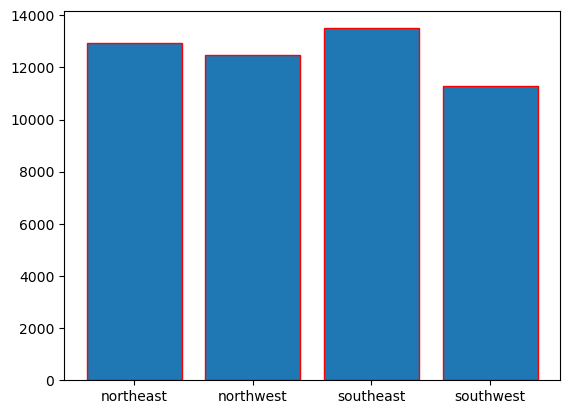

In [ ]:
plt.bar(female_regions,average_charges,ec="red")
plt.show()

In [ ]:
plt.bar(list(male_group_analysis["mean_charge"].index),list(male_group_analysis["mean_charge"].values),ec="red")
plt.show()

NameError: name 'male_group_analysis' is not defined

In [ ]:
df.bmi.isnull().sum()

0

In [ ]:
df.describe()

,age,bmi,child,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
bmi=df["bmi"].values
li=[]
for i in bmi:
    if i<18.5:
        li.append("underweight")
    elif i>=18.5 and i<=24.9:
        li.append("HealthyWeight")
    elif i>=25 and i<=29.9:
        li.append("overweight")
    else:
        li.append("obese")

df["healthCategory"]=li
df.head()

,age,gender,bmi,child,smoker,region,charges,status,healthCategory
0,19,female,27.900,0,yes,southwest,16884.92400,overweight,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese,obese
3,33,male,22.705,0,no,northwest,21984.47061,HealthyWeight,HealthyWeight
4,32,male,28.880,0,no,northwest,3866.85520,overweight,overweight


In [ ]:
# gender==>  onehot encode
gender_dict={'female':0,'male':1}
smoker_dict={"yes":1,"no":0}
df["gender"]=df["gender"].map(dt)
df["smoker"]=df["smoker"].map(smoker_dict)

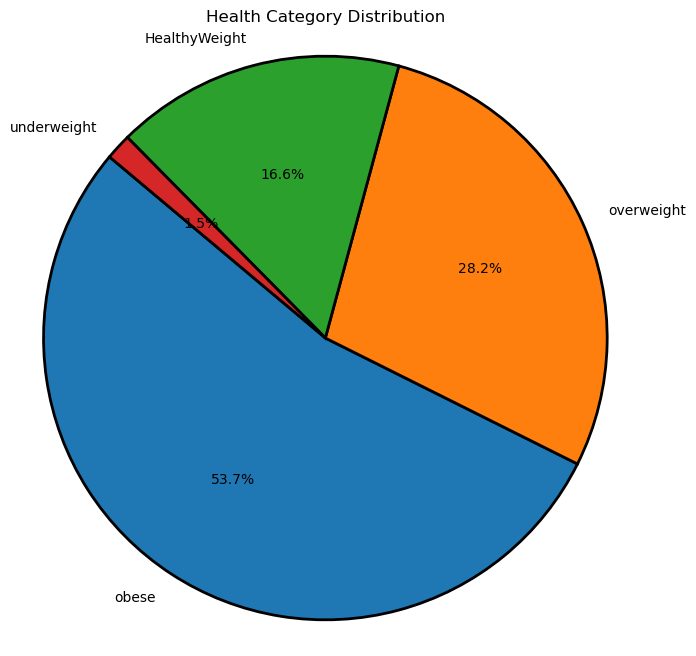

In [ ]:
value_counts = df['healthCategory'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140,wedgeprops={'ec':'k','lw':2})
plt.title('Health Category Distribution')
plt.axis('equal')
plt.show()

In [ ]:
df['healthCategory'].value_counts()

healthCategory
obese            719
overweight       377
HealthyWeight    222
underweight       20
Name: count, dtype: int64

In [ ]:
health_category_dict={'underweight':1,'HealthyWeight':2,'overweight':3,'obese':4}
df['healthCategory']=df['healthCategory'].map(health_category_dict)

In [ ]:
df.head()

,age,gender,bmi,child,smoker,region,charges,status,healthCategory
0,19,0,27.900,0,1,southwest,16884.92400,overweight,3
1,18,1,33.770,1,0,southeast,1725.55230,obese,4
2,28,1,33.000,3,0,southeast,4449.46200,obese,4
3,33,1,22.705,0,0,northwest,21984.47061,HealthyWeight,2
4,32,1,28.880,0,0,northwest,3866.85520,overweight,3


In [ ]:
import pandas as pd
final_data=pd.get_dummies(df).astype(int)
final_data.head()

,age,gender,bmi,child,smoker,charges,healthCategory,region_northeast,region_northwest,region_southeast,region_southwest,status_HealthyWeight,status_obese,status_overweight,status_underweight
0,19,0,27,0,1,16884,3,0,0,0,1,0,0,1,0
1,18,1,33,1,0,1725,4,0,0,1,0,0,1,0,0
2,28,1,33,3,0,4449,4,0,0,1,0,0,1,0,0
3,33,1,22,0,0,21984,2,0,1,0,0,1,0,0,0
4,32,1,28,0,0,3866,3,0,1,0,0,0,0,1,0


In [ ]:
### x and y split
x=final_data.drop('charges',axis='columns')
y=final_data[['charges']]


In [ ]:
# training and testing split test_size=0.2
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.2)

In [ ]:
## model Training
# Regression
#1. LinearRegression
#2. DecisionTree
#3.RandomForest

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier


In [ ]:
# objecct creation

In [ ]:
# hyper parameter turning ---> to obtain highest accuracy
lnr=LinearRegression()
dtr=DecisionTreeRegressor()
rdmfr=RandomForestRegressor()
# I am going with default parameter


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
lnr.fit(x_train,y_train)
dtr.fit(x_train,y_train)
rdmfr.fit(x_train,y_train)
print("trained bro")

trained bro


In [ ]:
# Model Evaluation
print("Training score by linear",lnr.score(x_train,y_train)*100)
print("Training score by DecisionTree",dtr.score(x_train,y_train)*100)
print("Training score by RandomForest",rdmfr.score(x_train,y_train)*100)
print(" ")

print("Testing score by linear",lnr.score(x_test,y_test)*100)
print("Testing score by DecisionTree",dtr.score(x_test,y_test)*100)
print("Testing score by RandomForest",rdmfr.score(x_test,y_test)*100)



Training score by linear 75.48525814827832
Training score by DecisionTree 99.90978073361225
Training score by RandomForest 97.7153785164384
 
Testing score by linear 75.65607551285498
Testing score by DecisionTree 65.95727352899578
Testing score by RandomForest 83.80308518901654


In [ ]:
#Prediction
prediction_linear = lnr.predict(x_test)
prediction_DescionTree = dtr.predict(x_test)
prediction_randomforest = rdmfr.predict(x_test)

In [ ]:
comparision_df = pd.concat([x_test,y_test],axis=1)
comparision_df

,age,gender,bmi,child,smoker,healthCategory,region_northeast,region_northwest,region_southeast,region_southwest,status_HealthyWeight,status_obese,status_overweight,status_underweight,charges
431,29,0,20,2,0,2,0,1,0,0,1,0,0,0,4906
439,26,1,29,0,0,3,1,0,0,0,0,0,1,0,2897
723,19,1,35,0,0,4,0,0,0,1,0,1,0,0,1263
310,50,1,26,0,0,3,0,0,0,1,0,0,1,0,8444
975,29,1,22,0,1,2,1,0,0,0,1,0,0,0,16138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,46,1,42,3,1,4,0,0,1,0,0,1,0,0,46151
489,53,1,31,1,0,4,0,1,0,0,0,1,0,0,10461
654,59,0,35,0,0,4,0,0,1,0,0,1,0,0,12244
313,49,1,35,0,0,4,0,0,1,0,0,1,0,0,8124


In [ ]:
comparision_df["prediction_linear"]=prediction_linear
comparision_df["prediction_DescionTree"]=prediction_DescionTree
comparision_df["prediction_randomforest"]=prediction_randomforest

In [ ]:
comparision_df

,age,gender,bmi,child,smoker,healthCategory,region_northeast,region_northwest,region_southeast,region_southwest,status_HealthyWeight,status_obese,status_overweight,status_underweight,charges,prediction_linear,prediction_DescionTree,prediction_randomforest
431,29,0,20,2,0,2,0,1,0,0,1,0,0,0,4906,2810.057063,4922.0,5876.6300
439,26,1,29,0,0,3,1,0,0,0,0,0,1,0,2897,3519.096520,2727.0,3240.9900
723,19,1,35,0,0,4,0,0,0,1,0,1,0,0,1263,4565.807008,1261.0,2705.3000
310,50,1,26,0,0,3,0,0,0,1,0,0,1,0,8444,8078.091809,8782.0,10014.6300
975,29,1,22,0,1,2,1,0,0,0,1,0,0,0,16138,26713.935322,16115.0,16556.8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,46,1,42,3,1,4,0,0,1,0,0,1,0,0,46151,37594.414067,44202.0,46581.0400
489,53,1,31,1,0,4,0,1,0,0,0,1,0,0,10461,13414.756393,10085.0,13164.2475
654,59,0,35,0,0,4,0,0,1,0,0,1,0,0,12244,14741.342338,12622.0,15114.9300
313,49,1,35,0,0,4,0,0,1,0,0,1,0,0,8124,12218.536274,8125.0,9108.8300


In [ ]:
comparision_df.to_csv('prediction.csv',index=False)

,age,gender,bmi,child,smoker,region,charges,status,healthCategory
0,19,0,27.900,0,1,southwest,16884.92400,overweight,3
1,18,1,33.770,1,0,southeast,1725.55230,obese,4
2,28,1,33.000,3,0,southeast,4449.46200,obese,4
3,33,1,22.705,0,0,northwest,21984.47061,HealthyWeight,2
4,32,1,28.880,0,0,northwest,3866.85520,overweight,3
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,obese,4
1334,18,0,31.920,0,0,northeast,2205.98080,obese,4
1335,18,0,36.850,0,0,southeast,1629.83350,obese,4
1336,21,0,25.800,0,0,southwest,2007.94500,overweight,3


In [ ]:
# SAVING THE MODEL
import joblib,os
os.makedirs('models',exist_ok=True)
joblib.dump(lnr,'./models/linear_model.lb')
joblib.dump(dtr,'./models/decisiontree.lb')
joblib.dump(rdmfr,'./models/randomforest.lb')

['./models/randomforest.lb']

In [ ]:
### Thank you😊

['.ipynb_checkpoints', 'insurance.ipynb', 'models', 'prediction.csv']

In [3]:
x_train.shape

NameError: name 'x_train' is not defined

In [4]:
x_train.columns

NameError: name 'x_train' is not defined